In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import tensorflow as tf

In [97]:
IMG_SIZE = 224
BATCH_SIZE = 16

In [98]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Oral Cancer Dataset",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
)

Found 485 files belonging to 2 classes.
Using 388 files for training.


In [99]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Oral Cancer Dataset",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 485 files belonging to 2 classes.
Using 97 files for validation.


In [100]:
class_names = train_ds.class_names

In [101]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)

In [102]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

In [103]:
base_model = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # freeze weights

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [104]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [105]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [106]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [107]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.7035 - loss: 0.5131 - val_accuracy: 0.8351 - val_loss: 0.2991
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.8934 - loss: 0.2078 - val_accuracy: 0.8969 - val_loss: 0.2706
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.9514 - loss: 0.1383 - val_accuracy: 0.9072 - val_loss: 0.2157
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.9624 - loss: 0.1126 - val_accuracy: 0.9278 - val_loss: 0.1596
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9823 - loss: 0.0720 - val_accuracy: 0.9278 - val_loss: 0.1352
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.9966 - loss: 0.0455 - val_accuracy: 0.9278 - val_loss: 0.1320
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9902 - loss: 0.0467 - val_accuracy: 0.9381 - val_loss: 0.1236
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.9913 - loss: 0.0487 - val_accuracy: 0.91

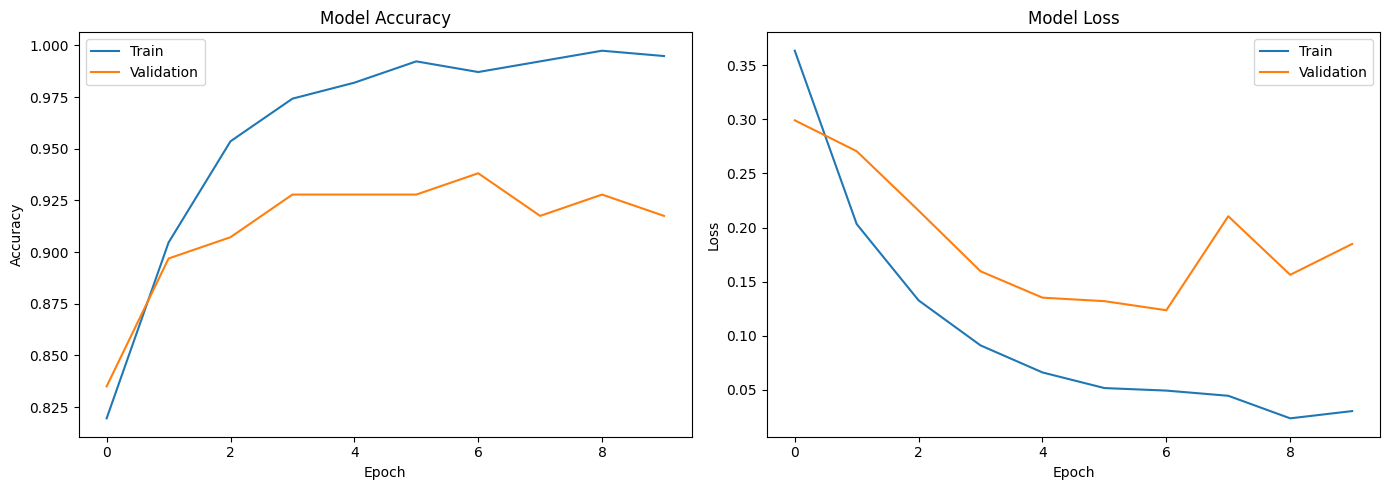

In [108]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title("Model Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")
ax[0].legend(["Train", "Validation"])

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title("Model Loss")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].legend(["Train", "Validation"])

plt.tight_layout()
plt.show()

In [109]:
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_pred.extend((preds > 0.5).astype("int32"))
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=["Cancer", "Non Cancer"]))

              precision    recall  f1-score   support

      Cancer       0.88      0.96      0.92        47
  Non Cancer       0.96      0.88      0.92        50

    accuracy                           0.92        97
   macro avg       0.92      0.92      0.92        97
weighted avg       0.92      0.92      0.92        97



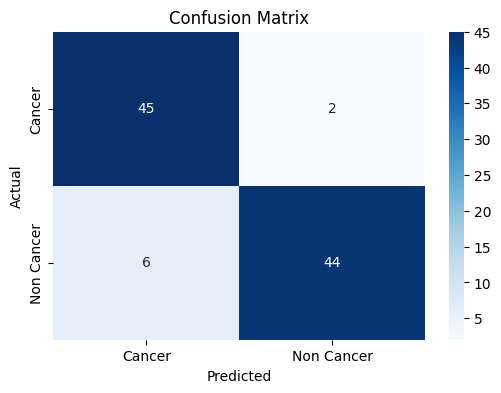

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Cancer", "Non Cancer"],
            yticklabels=["Cancer", "Non Cancer"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()